# Ciclo diesel real 

Este es un estudio para un ciclo diesel real, donde nos basamos en el motor 2.0 TDI de Volkswagen, pero se puede extrapolar para otros motores.
La libreria Thermal_process es creada por Victor Bernal y Oliver lira para simular ciclos termodinamicos.

In [1]:
import thermal_process as tp
import matplotlib.pyplot as plt
import numpy as np

Porcentaje eficiencia: 56.12%
Trabajo en el cilindro: -700.38J


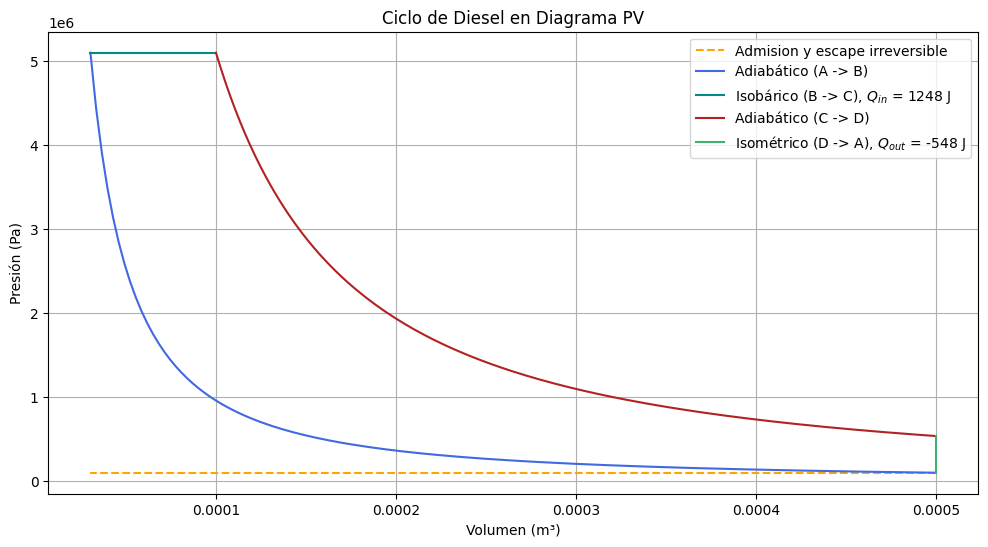

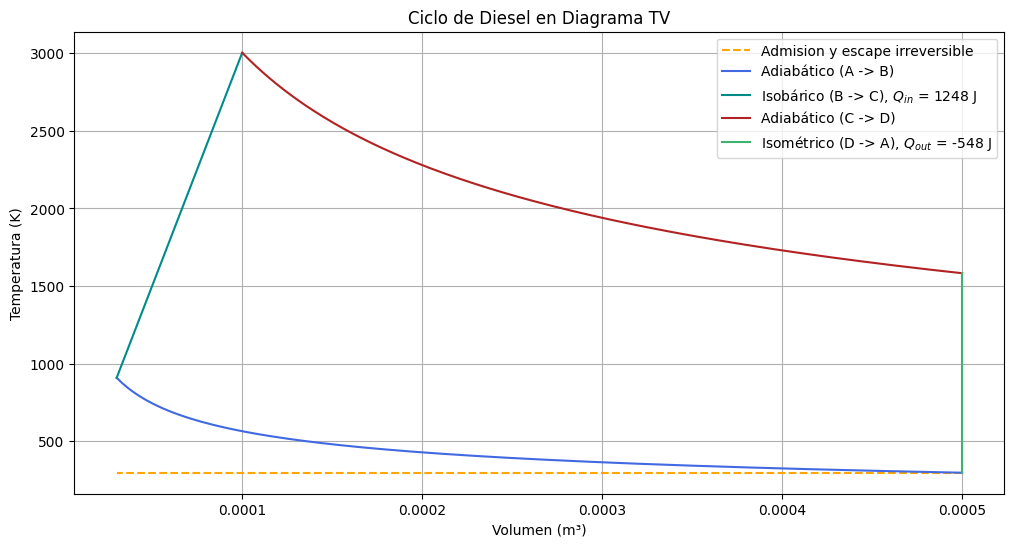

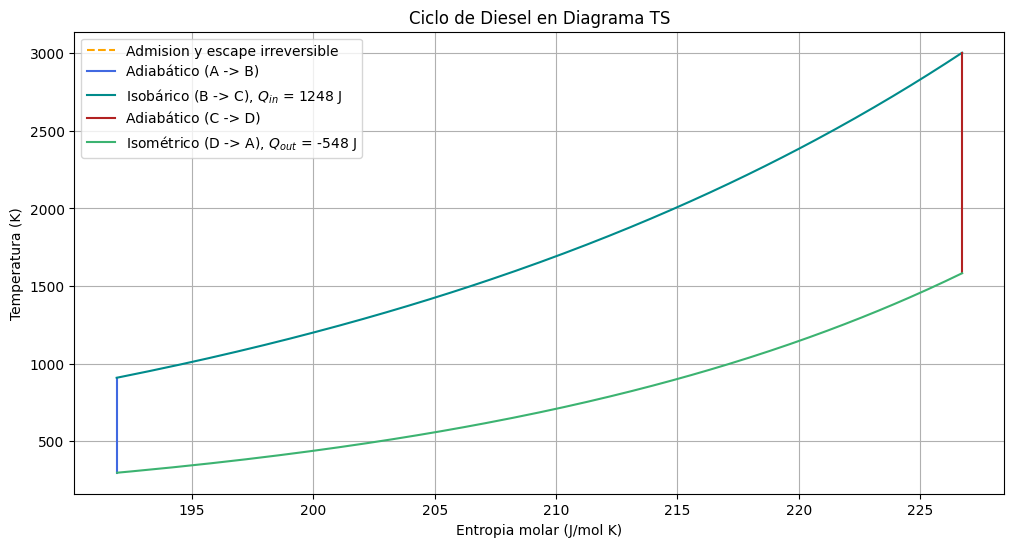

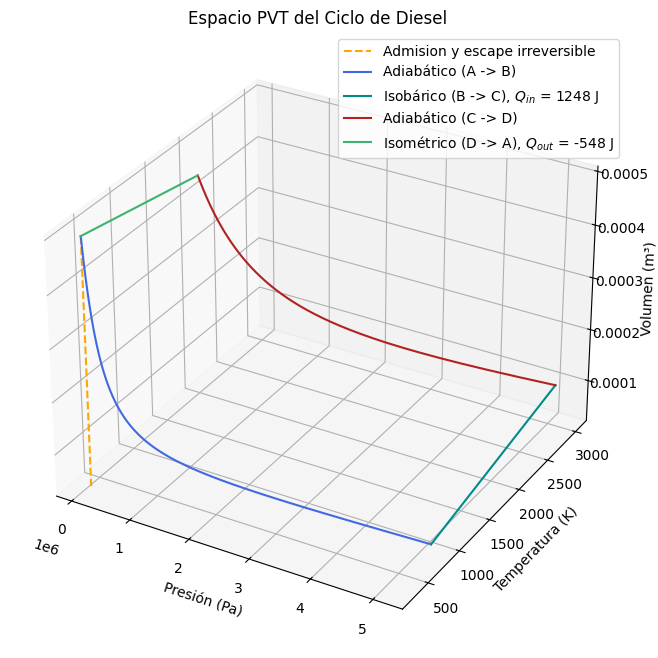

[56.1153260718816, -700.3812038321552]

In [2]:
tp.diesel()

In [7]:
Rc = np.zeros((100,1))
ef_worr_matrix = np.zeros((100,2))
for i in range(100):
    Rc[i][0] = i+4 
    ef_worr_matrix[i] = tp.diesel(rc =Rc[i][0],PV = False,TV = False,TS = False,PVT = False)

Porcentaje eficiencia: 12.37%
Trabajo en el cilindro: -154.36J
Porcentaje eficiencia: 21.56%
Trabajo en el cilindro: -269.06J
Porcentaje eficiencia: 28.31%
Trabajo en el cilindro: -353.33J
Porcentaje eficiencia: 33.54%
Trabajo en el cilindro: -418.59J
Porcentaje eficiencia: 37.74%
Trabajo en el cilindro: -471.05J
Porcentaje eficiencia: 41.22%
Trabajo en el cilindro: -514.41J
Porcentaje eficiencia: 44.15%
Trabajo en el cilindro: -551.03J
Porcentaje eficiencia: 46.67%
Trabajo en el cilindro: -582.48J
Porcentaje eficiencia: 48.86%
Trabajo en el cilindro: -609.88J
Porcentaje eficiencia: 50.80%
Trabajo en el cilindro: -634.03J
Porcentaje eficiencia: 52.52%
Trabajo en el cilindro: -655.53J
Porcentaje eficiencia: 54.07%
Trabajo en el cilindro: -674.82J
Porcentaje eficiencia: 55.46%
Trabajo en el cilindro: -692.26J
Porcentaje eficiencia: 56.74%
Trabajo en el cilindro: -708.14J
Porcentaje eficiencia: 57.90%
Trabajo en el cilindro: -722.66J
Porcentaje eficiencia: 58.97%
Trabajo en el cilindro: -

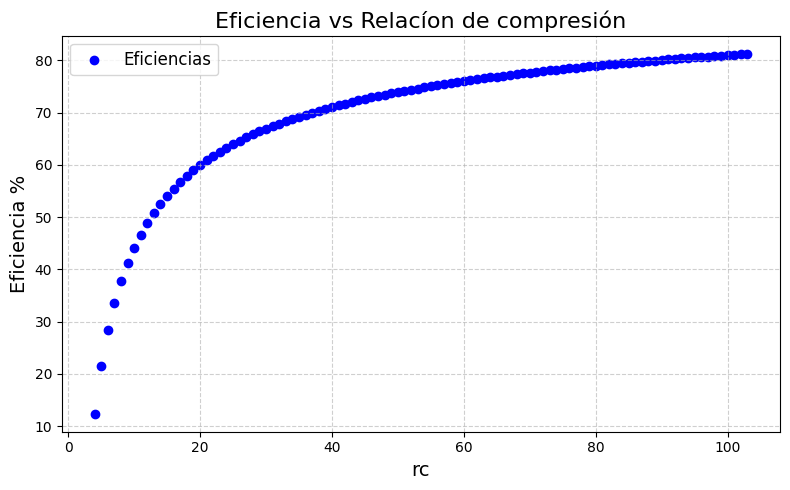

In [8]:
# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(8, 5))  # Tamaño opcional de la figura

# Trazar la gráfica
ax.scatter(Rc[:,0], ef_worr_matrix[:,0], label='Eficiencias', color='blue')

# Personalización
ax.set_title("Eficiencia vs Relacíon de compresión", fontsize=16)
ax.set_xlabel("rc", fontsize=14)
ax.set_ylabel("Eficiencia %", fontsize=14)
ax.grid(True, linestyle='--', alpha=0.6)  # Agregar una cuadrícula
ax.legend(fontsize=12)  # Mostrar leyenda

# Mostrar la gráfica
plt.tight_layout()
plt.show()

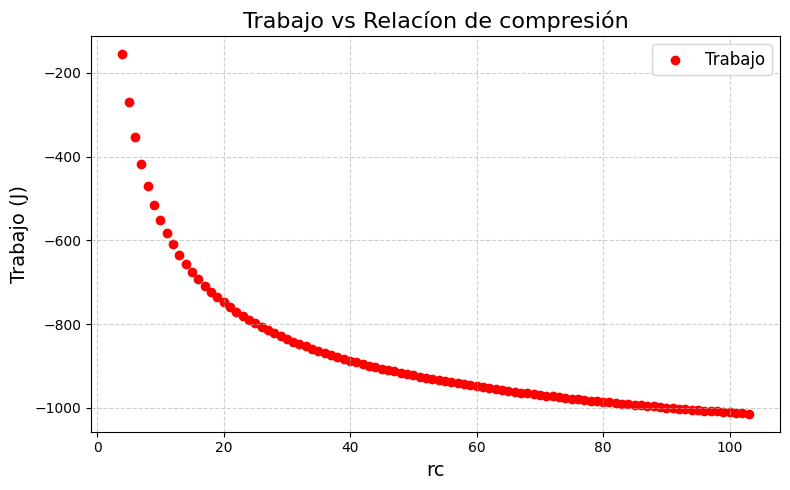

In [9]:
# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(8, 5))  # Tamaño opcional de la figura

# Trazar la gráfica
ax.scatter(Rc[:,0], ef_worr_matrix[:,1], label='Trabajo', color='red')

# Personalización
ax.set_title("Trabajo vs Relacíon de compresión", fontsize=16)
ax.set_xlabel("rc", fontsize=14)
ax.set_ylabel("Trabajo (J)", fontsize=14)
ax.grid(True, linestyle='--', alpha=0.6)  # Agregar una cuadrícula
ax.legend(fontsize=12)  # Mostrar leyenda

# Mostrar la gráfica
plt.tight_layout()
plt.show()

In [12]:
dcp = np.zeros((100,1))
ef_worr_matrix = np.zeros((100,2))
for i in range(100):
    dcp[i][0] = (i+1)/100
    ef_worr_matrix[i] = tp.diesel(DCP= dcp[i][0],PV = False,TV = False,TS = False,PVT = False)

Porcentaje eficiencia: 67.09%
Trabajo en el cilindro: -8.54J
Porcentaje eficiencia: 66.94%
Trabajo en el cilindro: -17.05J
Porcentaje eficiencia: 66.79%
Trabajo en el cilindro: -25.52J
Porcentaje eficiencia: 66.64%
Trabajo en el cilindro: -33.95J
Porcentaje eficiencia: 66.50%
Trabajo en el cilindro: -42.35J
Porcentaje eficiencia: 66.35%
Trabajo en el cilindro: -50.70J
Porcentaje eficiencia: 66.21%
Trabajo en el cilindro: -59.02J
Porcentaje eficiencia: 66.06%
Trabajo en el cilindro: -67.31J
Porcentaje eficiencia: 65.92%
Trabajo en el cilindro: -75.56J
Porcentaje eficiencia: 65.78%
Trabajo en el cilindro: -83.78J
Porcentaje eficiencia: 65.64%
Trabajo en el cilindro: -91.96J
Porcentaje eficiencia: 65.50%
Trabajo en el cilindro: -100.11J
Porcentaje eficiencia: 65.36%
Trabajo en el cilindro: -108.22J
Porcentaje eficiencia: 65.23%
Trabajo en el cilindro: -116.30J
Porcentaje eficiencia: 65.09%
Trabajo en el cilindro: -124.35J
Porcentaje eficiencia: 64.96%
Trabajo en el cilindro: -132.37J
Porc

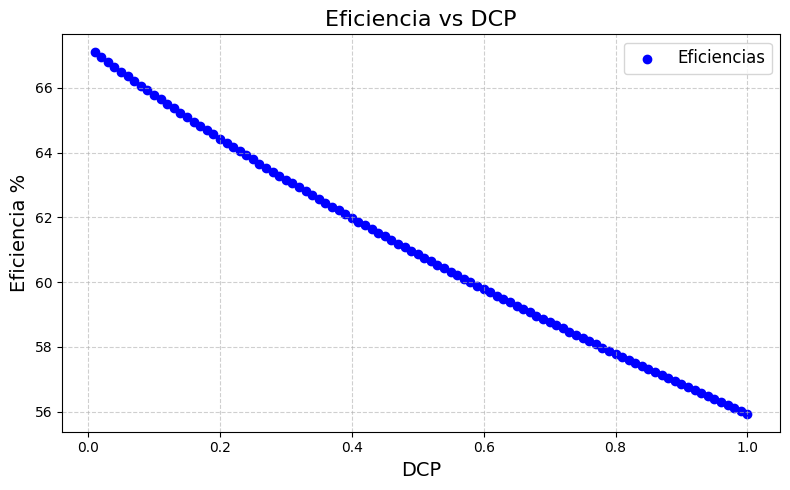

In [15]:
# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(8, 5))  # Tamaño opcional de la figura

# Trazar la gráfica
ax.scatter(dcp[:,0], ef_worr_matrix[:,0], label='Eficiencias', color='blue')

# Personalización
ax.set_title("Eficiencia vs DCP", fontsize=16)
ax.set_xlabel("DCP", fontsize=14)
ax.set_ylabel("Eficiencia %", fontsize=14)
ax.grid(True, linestyle='--', alpha=0.6)  # Agregar una cuadrícula
ax.legend(fontsize=12)  # Mostrar leyenda

# Mostrar la gráfica
plt.tight_layout()
plt.show()

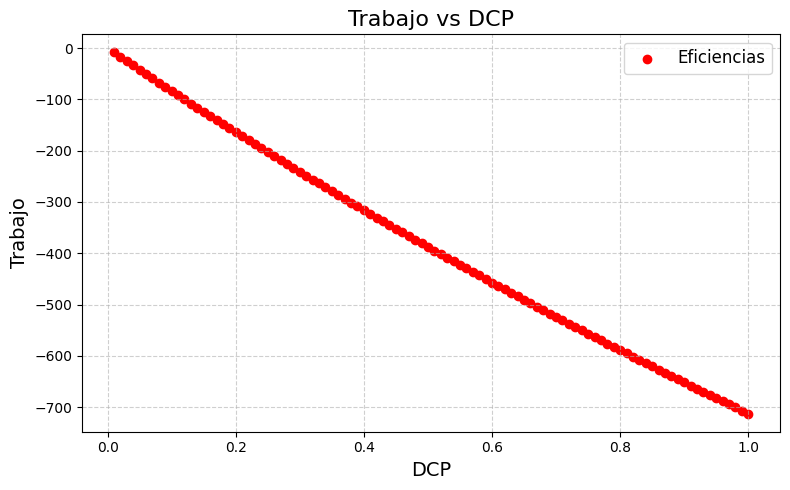

In [16]:
# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(8, 5))  # Tamaño opcional de la figura

# Trazar la gráfica
ax.scatter(dcp[:,0], ef_worr_matrix[:,1], label='Eficiencias', color='red')

# Personalización
ax.set_title("Trabajo vs DCP", fontsize=16)
ax.set_xlabel("DCP", fontsize=14)
ax.set_ylabel("Trabajo", fontsize=14)
ax.grid(True, linestyle='--', alpha=0.6)  # Agregar una cuadrícula
ax.legend(fontsize=12)  # Mostrar leyenda

# Mostrar la gráfica
plt.tight_layout()
plt.show()